<a href="https://colab.research.google.com/github/Mafecedeno12/Taller-1-FC/blob/main/Taller_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Taller 1


*   María Fernanda Cedeño 





In [ ]:
# Se importan las librerías
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sbn
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats
import pylab as py

In [ ]:
# Para descargar los datos del mercado
!pip install yfinance
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


1. Descargue las series de tiempo de precios (ajustados) mensuales para el periodo Ene-
2010 a Dic-2021 de las siguientes 4 acciones: MCD, GE, IBM, T. Con esta información:

[*********************100%***********************]  4 of 4 completed


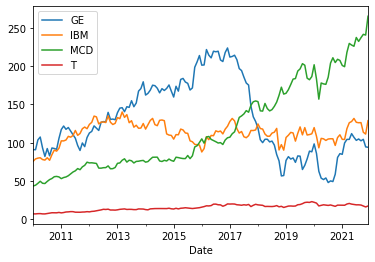

In [ ]:
# Precios históricos para los activos seleccionados
activos = ["MCD", "GE","IBM","T"]
precios = yf.download(activos,start="2010-01-01",end="2021-12-31",interval="1Mo").dropna()
precios = precios.loc[:,"Adj Close"]
precios.plot();

a.Calcule los retornos logarítmicos.


In [ ]:
retornos= np.log(precios/precios.shift()).dropna()
retornos

,GE,IBM,MCD,T
Date,,,,
2010-02-01,-0.001245,0.038233,0.022490,-0.002180
2010-03-01,0.131312,0.012998,0.052432,0.040677
2010-04-01,0.035622,0.005831,0.056384,0.008478
2010-05-01,-0.142815,-0.029421,-0.054138,-0.048563
2010-06-01,-0.125611,-0.009200,-0.006701,-0.004537
...,...,...,...,...
2021-08-01,0.017320,-0.004408,-0.021868,0.001370
2021-09-01,-0.022837,0.001349,0.020721,-0.015065
2021-10-01,0.018479,-0.104857,0.018247,-0.066985


Del resultado del cálculo de los retornos logaritmicos de los activos GE, IBM, MCD Y T, se pudo observar que en el caso de GE hubo una tendencia negativa y el cierre tuvo rendimientos no muy favorables, por lo que se puede decir que el comportamiento de los retornos no fue optimo. Por el lado de
IBM, MCD Y T, se pudo observar que no siguieron una tendencia marcada, son activos con retornos poco seguros y que tuvieron un comportamiento de los retornos muy volatiles.

b. Calcule las estadísticas descriptivas (media, mediana, desv. estándar, curtosis, simetría) para cada uno de ellos. Presente los estadísticos en una tabla para todos los activos.

In [ ]:
Estadistica = pd.DataFrame()

Media=retornos.mean()
Mediana=retornos.median()
Kurtosis= retornos.kurt()
Simetria= retornos.skew()
Desviacion_Estandar=retornos.std()
Estadistica["Media"]= Media
Estadistica["Mediana"]= Mediana
Estadistica["Desviacion_Estandar"]= Desviacion_Estandar
Estadistica["Kurtosis"]= Kurtosis
Estadistica["Simetria"]= Simetria
print(Estadistica)

        Media   Mediana  Desviacion_Estandar  Kurtosis  Simetria
GE   0.000231 -0.001930             0.086937  3.040766 -0.088297
IBM  0.003689  0.002619             0.060536  2.653576 -0.564631
MCD  0.012605  0.011742             0.042488  1.596996 -0.410193
T    0.006158  0.006483             0.048299  1.549802 -0.707907




*   IBM: Se logra observar que la dispersión de los retornos en relación con el promedio de los propios rendimientos  fue de 0,060, que se presenta una desviación menor a la de los retornos de GE, que por su resultado de de -0,56 se presenta una asimetria hacia la derecha y que el 50% de los retornos toma valores inferiores a  0.003689.

*   GE: Se logra observar que los retornos no son simetricos, puesto que los valores de la media y mediana no toman valores similares. De la desviación de los retornos en relación al promedio podemos decir que genera mayor incertidumbre en relación a su rendimiento y de la Kurtosis podemos ver que es tipo Leptocúrtica.

*   MCD: Se logra observar que la dispersión de los retornos en relación con el promedio de los propios rendimientos  fue de 0,042, que se presenta una desviación menor a la de los retornos de IMB y GE, que por su resultado de de -0,410 se presenta una asimetria hacia la derecha y que el 50% de los retornos toma valores inferiores a  0.011.

* T: Se logra observar que la dispersión de los retornos en relación con el promedio de los propios rendimientos  fue de 0.048 que se presenta una desviación menor a la de los retornos de GE, que por su resultado de de -0,70 se presenta una asimetria hacia la derecha y que el 50% de los retornos toma valores inferiores a  0.006.





c. Presente en un Data Frame los retornos esperados y las volatilidades anualizadas

In [ ]:
#  Retorno esperado y la volatilidad anualizada de GE
mean,sigma= retornos["GE"].mean(),retornos["GE"].std()
print(mean,sigma)
mean*12, sigma*np.sqrt(12)

0.00023139213851205347 0.08693658398623175


(0.0027767056621446416, 0.30115716100126444)



*   Teniendo en cuenta el resultado, que puede variar en 0.30 unidades, se espera un retorno de 0.002 y se asume un riesgo alto por el bajo rendimeinto que presenta.




In [ ]:
#  Retorno esperado y la volatilidad anualizada de IBM
mean,sigma= retornos["IBM"].mean(),retornos["IBM"].std()
print(mean,sigma)
mean*12, sigma*np.sqrt(12)

0.003689234545083373 0.060536145173564246


(0.04427081454100047, 0.20970335826995748)



*   Teniendo en cuenta el resultado, que puede variar en 0.209 unidades, se espera un retorno de 0.044 y se asume un riesgo alto por el bajo rendimeinto que presenta. Sin embargo, este activo presenta una mejor relación riesgo/retorno.




In [ ]:
#  Retorno esperado y la volatilidad anualizada de MCD
mean,sigma= retornos["MCD"].mean(),retornos["MCD"].std()
print(mean,sigma)
mean*12, sigma*np.sqrt(12)

0.012605418316430885 0.04248819250519681


(0.1512650197971706, 0.14718341628153608)



*   Teniendo en cuenta el resultado, que puede variar en 0.14 unidades, se espera un retorno de 0.15 y se asume un riesgo alto por el bajo rendimeinto que presenta. Sin embargo, este activo presenta una mejor relación riesgo/retorno.




In [ ]:
#  Retorno esperado y la volatilidad anualizada de GE
mean,sigma= retornos["T"].mean(),retornos["T"].std()
print(mean,sigma)
mean*12, sigma*np.sqrt(12)

0.006157858673835801 0.04829859070426971


(0.07389430408602961, 0.167311226067538)



*   Teniendo en cuenta el resultado, que puede variar en 0.76 unidades, se espera un retorno de 1.55 y se asume un riesgo alto por el bajo rendimeinto que presenta. Sin embargo, este activo presenta una mejor relación riesgo/retorno.




d. Calcule la matriz de correlaciones de Pearson y de Sperman

In [ ]:
#Matriz de correlación de Pearson
retornos_corr1= retornos.corr(method="pearson")
retornos_corr1

,GE,IBM,MCD,T
GE,1.000000,0.363578,0.151318,0.346994
IBM,0.363578,1.000000,0.322563,0.412458
MCD,0.151318,0.322563,1.000000,0.338351
T,0.346994,0.412458,0.338351,1.000000


In [ ]:
retornos_corr2= retornos.corr(method="spearman")
retornos_corr2

,GE,IBM,MCD,T
GE,1.000000,0.343396,0.091615,0.312855
IBM,0.343396,1.000000,0.260223,0.358745
MCD,0.091615,0.260223,1.000000,0.299497
T,0.312855,0.358745,0.299497,1.000000


e. Grafique el histograma de frecuencia de los retornos para dos de las cuatro acciones

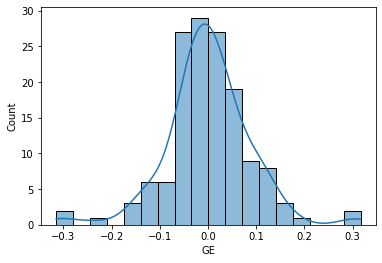

In [ ]:
#Histograma de freuencia para GE
retornos= np.log(precios/precios.shift()).dropna()
sbn.histplot(data=retornos, x="GE", kde=True, bins=18);

El histograma muestr datos asimetricos hacia la izquierda, esto nos muestra los datos de tiempo de falla.
También se puedver un dato atípico de 0,3, o sea,  no fue comun obtener este retorno.
los retornos que menos veces se consiguieron fue 0,2 y -0,2.

Se logra observar una gran concentracion de datos respecto a la media. Es decir los retornos se acercaron a 0.0.

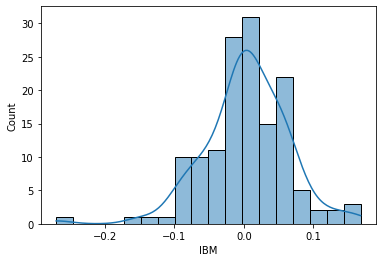

In [ ]:
#Histograma de frecuencia para IBM
retornos= np.log(precios/precios.shift()).dropna()
sbn.histplot(data=retornos, x="IBM", kde=True, bins=18);

f. Implemente las pruebas de normalidad de Kolmogorov-Smirnov para todos los activos. Consolide los resultados en un Data Frame para todos



In [ ]:
PN={"GE":stats.kstest(retornos["GE"],'norm'),"IBM":stats.kstest(retornos["IBM"],'norm'),"MCD":stats.kstest(retornos["MCD"],'norm'), "T":stats.kstest(retornos["T"],'norm')} 
DF_PN=pd.DataFrame(PN,index=["statistic","pvalue"])
DF_PN

,GE,IBM,MCD,T
statistic,4.159825e-01,4.372657e-01,4.543298e-01,4.606996e-01
pvalue,6.375047e-23,2.144155e-25,1.736385e-27,2.713295e-28


2. Data Frame volatilidades

In [ ]:
activos = ["MCD", "GE","IBM","T"]
precios2 = yf.download(activos,start="2010-01-01",end="2021-12-31",interval="1Mo").dropna()

precios2

[*********************100%***********************]  4 of 4 completed


Adj Close                                          Close  \
                    GE         IBM         MCD          T          GE   
Date                                                                    
2010-01-01   91.124489   76.034485   43.710953   7.295420  123.692307   
2010-02-01   91.011162   78.997826   44.705185   7.279536  123.538460   
2010-03-01  103.782249   80.031334   47.111687   7.581748  140.000000   
2010-04-01  107.545776   80.499367   49.844322   7.646298  145.076920   
2010-05-01   93.232933   78.165527   47.217590   7.283843  125.769234   
...                ...         ...         ...        ...         ...   
2021-08-01  105.016106  126.196472  232.276581  19.121511  105.410004   
2021-09-01  102.645004  126.366852  237.139908  18.835596  103.029999   
2021-10-01  104.559380  113.787468  241.506790  17.615223  104.870003   
2021-11-01   94.708633  111.410393  240.572433  16.332380   94.989998   
2021-12-01   94.190178  128.862701  265.117676  17.598621   94.470001   

                                                     High              ...  \
                   IBM         MCD          T          GE         IBM  ...   
Date                                                                   ...   
2010-01-01  117.007645   62.430000  19.154079  130.153839  128.346085  ...   
2010-02-01  121.567879   63.849998  18.738670  131.000000  122.629066  ...   
2010-03-01  122.609940   66.720001  19.516617  145.692307  124.980881  ...   
2010-04-01  123.326958   70.589996  19.682779  151.538467  126.462715  ...   
2010-05-01  119.751434   66.870003  18.353474  148.769226  127.246651  ...   
...                ...         ...        ...         ...         ...  ...   
2021-08-01  134.168259  237.460007  20.709970  107.230003  138.336517  ...   
2021-09-01  132.820267  241.110001  20.400303  107.360001  134.388138  ...   
2021-10-01  119.598473  245.550003  19.078550  110.970001  139.579346  ...   
2021-11-01  117.099998  244.600006  17.243202  116.169998  124.779999  ...   
2021-12-01  133.660004  268.070007  18.580059   98.940002  134.990005  ...   

                   Low                   Open                          \
                   MCD          T          GE         IBM         MCD   
Date                                                                    
2010-01-01   61.060001  18.927492  117.076920  125.411087   62.630001   
2010-02-01   62.540001  18.587612  124.615387  117.810707   62.830002   
2010-03-01   63.250000  18.663141  123.846153  121.892921   63.980000   
2010-04-01   67.059998  19.244713  140.538467  123.279160   67.059998   
2010-05-01   65.550003  17.960726  145.923080  123.699806   70.879997   
...                ...        ...         ...         ...         ...   
2021-08-01  233.050003  20.302114  104.480003  135.229446  244.240005   
2021-09-01  235.949997  20.347431  105.360001  133.824097  237.880005   
2021-10-01  236.139999  18.889729  104.180000  134.799240  243.070007   
2021-11-01  243.949997  17.031721  105.760002  119.550667  245.800003   
2021-12-01  244.110001  16.631420   96.550003  118.250000  245.759995   

                            Volume                                          
                    T           GE          IBM          MCD             T  
Date                                                                        
2010-01-01  21.457705  208407550.0  163291687.0  158366700.0  9.665184e+08  
2010-02-01  19.388218  183090323.0  118418914.0  150643900.0  7.664459e+08  
2010-03-01  18.814199  270393890.0  146437175.0  153461200.0  7.816918e+08  
2010-04-01  19.675226  210661724.0  153162014.0  135971400.0  8.485327e+08  
2010-05-01  19.818731  267881367.0  197112633.0  185467000.0  9.881233e+08  
...               ...          ...          ...          ...           ...  
2021-08-01  21.329306  202482000.0   72891244.0   45210000.0  7.898068e+08  
2021-09-01  20.725077  211575700.0   80160627.0   55922700.0  9.844140e+08  
2021-10-01  20.498489  1371

In [ ]:
#a. Desviación Estandar
Estadistica.iloc[2]

Media                  0.012605
Mediana                0.011742
Desviacion_Estandar    0.042488
Kurtosis               1.596996
Simetria              -0.410193
Name: MCD, dtype: float64

Con los resultados de este activo se logra observar una desviación mayor en sus retornos seguidos por IBM

In [ ]:
#Parkinson
lnHL = np.log(precios2["High"]/precios2["Low"]).dropna()
sigmaPark_d = (((1/(4*np.log(2)))*lnHL**2)-(retornos.mean()**2)).mean()**0.5
sigmaPark_d

GE     0.093021
IBM    0.062220
MCD    0.049406
T      0.054067
dtype: float64

In [ ]:
# Volatilidad anulizada de Parkinson , con el numero 12 ya que los valores estan en meses
sigmaPark=sigmaPark_d*np.sqrt(12)
sigmaPark

GE     0.322234
IBM    0.215535
MCD    0.171148
T      0.187294
dtype: float64

In [ ]:
#C. Garmann-Klass la serie de volatilidad es mas suave , aunque tanto como en el ejemplo de clase dio un volatilidad ligeramnete mayor
lnHL = np.log(precios2["High"]/precios2["Low"]).dropna()
lnCO = np.log(precios2["Close"]/precios2["Open"]).dropna()
sigmaGK_d = ((0.5*lnHL**2-(2*np.log(2)-1)*lnCO**2)-(retornos.mean()**2)).mean()**0.5
sigmaGK_d

GE     0.094820
IBM    0.063019
MCD    0.052101
T      0.055676
dtype: float64

In [ ]:
# Volatilidad anulizada de Garman-Klass
sigmaGK=sigmaGK_d*np.sqrt(12)
sigmaGK

GE     0.328467
IBM    0.218304
MCD    0.180484
T      0.192866
dtype: float64

D) volatilidad ponderada exponencial (EWMA) con una lambda de 0.94.

In [ ]:
# Definir la función
#toman el dato mas reciente y lo ponderan con el 6% que va decreciendo
#Modelo tipo garch
def EWMAvol(retornos,Lambda):
  m = len(retornos) 
  b = np.arange(m-1,-1,-1) # secuencia decreciente
  l = np.repeat(0.94,m)

  varewma = ((np.power(retornos,2)*(np.power(l,b))).sum())*(1-Lambda)
  EWMAvol = np.sqrt(varewma)
  return(EWMAvol)

In [ ]:
m = len(retornos) 
#Son 143 los retornos
m

143

In [ ]:
#Se calcula la EWMA de cada accion
Lambda = 0.94
sigmaewma1 = EWMAvol(retornos["GE"],Lambda)*np.sqrt(12)
sigmaewma1

0.36506065019898853

In [ ]:
Lambda = 0.94
sigmaewma2 = EWMAvol(retornos["IBM"],Lambda)*np.sqrt(12)
sigmaewma2

0.25637083246955095

In [ ]:
Lambda = 0.94
sigmaewma3 = EWMAvol(retornos["MCD"],Lambda)*np.sqrt(12)
sigmaewma3

0.18180681254486156

In [ ]:
Lambda = 0.94
sigmaewma4 = EWMAvol(retornos["T"],Lambda)*np.sqrt(12)
sigmaewma4

0.18827748216301243

In [ ]:
ewmadf=pd.DataFrame({
    "Prueba de volatilidad":["EWMA","Desviacion","Parkinson","Garman-Klass"],
    "GE":[sigmaewma1,Estadistica.iloc[2,0],sigmaPark["GE"],sigmaGK["GE"]],
    "IBM":[sigmaewma2,Estadistica.iloc[2,1],sigmaPark["IBM"],sigmaGK["IBM"]],
    "MCD":[sigmaewma3,Estadistica.iloc[2,2],sigmaPark["MCD"],sigmaGK["MCD"]],
    "T":[sigmaewma4,Estadistica.iloc[2,3],sigmaPark["T"],sigmaGK["T"]],
})
ewmadf

,Prueba de volatilidad,GE,IBM,MCD,T
0,EWMA,0.365061,0.256371,0.181807,0.188277
1,Desviacion,0.012605,0.011742,0.042488,1.596996
2,Parkinson,0.322234,0.215535,0.171148,0.187294
3,Garman-Klass,0.328467,0.218304,0.180484,0.192866


De los anteriores resultados podemos ver que la acción GE presenta de las mayores volatilidades 

B. Gráfica volatilidad Parkinson

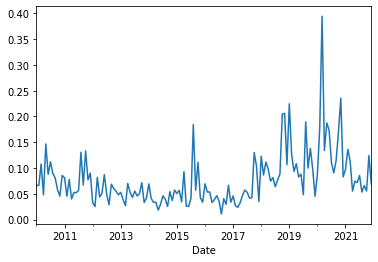

In [ ]:
sigmaPark_dp = (((1/(4*np.log(2)))*lnHL**2)-(retornos.mean()**2))**0.5
sigmaPark_dp["GE"].plot()

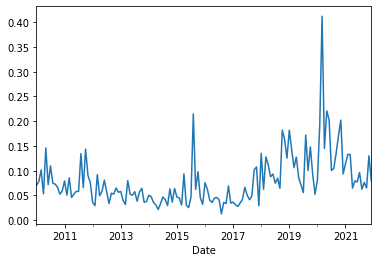

In [ ]:
#Garmann-Klass
sigmaGK_dp = ((0.5*lnHL**2-(2*np.log(2)-1)*lnCO**2)-(retornos.mean()**2))**0.5
sigmaGK_dp["GE"].plot()

In [ ]:
#En general el activo GE presentó mayor volatilidad entre el 2019 y 2021, y en el 2015

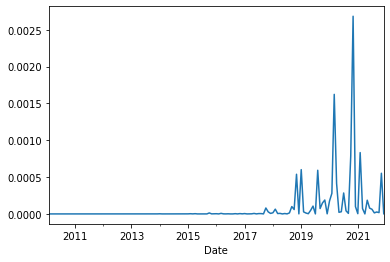

In [ ]:
#Medida EWMA
m = len(retornos) 
b = np.arange(m-1,-1,-1) # secuencia decreciente
l = np.repeat(0.94,m)

varewma = ((np.power(retornos["GE"],2)*(np.power(l,b))))*(1-Lambda)
varewma.plot()
